In [1]:
import os
from game_simulation1 import *
import matplotlib.pyplot as plt

### 1+1 SA-ES using System 1

In [19]:
def sa_es_0(iterations,num_games,tau,features):
      num_features=0
      if features==0:
        num_features=21
      else: 
        num_features = 7
      w = np.zeros(num_features)
      Sigma = 100 * np.ones(num_features)

      learning_curve =[]
      score = simulation(w,features)

      for t in range(iterations):
        score = simulation(w,features,3)
        new_Sigma = Sigma * np.exp(tau * np.random.normal(loc=[0]*len(w), scale=np.sqrt([1]*len(w))))
        new_w = w+new_Sigma*np.random.normal(loc=[0]*len(w), scale=np.sqrt([1]*len(w)))
        new_score  = simulation(new_w,features,3)
        if new_score >= score:
            score = new_score
            w= new_w
            Sigma = new_Sigma

        game_scores = [simulation(w,features) for _ in range(num_games)]
        learning_curve.append(np.mean(game_scores))
        if t%20 ==0:
          print("Iteration {}: Average score of best samples: {},{}".format(t+1, simulation2(w,features),score))
      return learning_curve,w

### 1+1 SA-ES using System 2

In [20]:
def sa_es_1(iterations,num_games,tau,features):
      num_features=0
      if features==0:
        num_features=21
      else: 
        num_features = 7
      w = np.zeros(num_features)
      Sigma = 100 * np.ones(num_features)

      learning_curve =[]
      score = simulation(w,features)

      for t in range(iterations):
        score = simulation(w,features,3)
        new_Sigma = Sigma * np.exp(tau * np.random.normal(loc=[0]*len(w), scale=np.sqrt([1]*len(w))))
        new_w = w+new_Sigma*np.random.normal(loc=[0]*len(w), scale=np.sqrt([1]*len(w)))
        new_score  = simulation(new_w,features,3)
        if new_score > score or (new_score == score and simulation2(new_w,features,3) >= simulation2(w,features,3)):
            score = new_score
            w= new_w
            Sigma = new_Sigma

        game_scores = [simulation(w,features) for _ in range(num_games)]
        learning_curve.append(np.mean(game_scores))
        if t%20 ==0:
          print("Iteration {}: Average score of best samples: {},{}".format(t+1, simulation2(w,features),score))
      return learning_curve,w

### 1+1 SA-ES using System 3

In [21]:
def sa_es_2(iterations,num_games,tau,features):
      num_features=0
      if features==0:
        num_features=21
      else: 
        num_features = 7
      w = np.zeros(num_features)
      Sigma = 100 * np.ones(num_features)

      learning_curve =[]
      score = simulation2(w,features)

      for t in range(iterations):
        score = simulation2(w,features,3)
        new_Sigma = Sigma * np.exp(tau * np.random.normal(loc=[0]*len(w), scale=np.sqrt([1]*len(w))))
        new_w = w+new_Sigma*np.random.normal(loc=[0]*len(w), scale=np.sqrt([1]*len(w)))
        new_score  = simulation2(new_w,features,3)
        if new_score >= score :
            score = new_score
            w= new_w
            Sigma = new_Sigma

        game_scores = [simulation(w,features) for _ in range(num_games)]
        learning_curve.append(np.mean(game_scores))
        if t%20 ==0:
          print("Iteration {}: Average score of best samples: {},{}".format(t+1, simulation2(w,features),simulation(w,features)))
      return learning_curve,w

### Evaluations

In [22]:
np.random.seed(42)
learning_curve_sa_es_0,W=sa_es_0(1000,1,0.01,0)


Iteration 1: Average score of best samples: 30.0,0.0
Iteration 21: Average score of best samples: 21.0,0.0
Iteration 41: Average score of best samples: 25.0,0.3333333333333333
Iteration 61: Average score of best samples: 18.0,0.3333333333333333
Iteration 81: Average score of best samples: 26.0,0.0
Iteration 101: Average score of best samples: 23.0,0.0
Iteration 121: Average score of best samples: 19.0,0.0
Iteration 141: Average score of best samples: 26.0,0.0
Iteration 161: Average score of best samples: 25.0,0.3333333333333333
Iteration 181: Average score of best samples: 28.0,0.0
Iteration 201: Average score of best samples: 25.0,0.3333333333333333
Iteration 221: Average score of best samples: 24.0,0.0
Iteration 241: Average score of best samples: 24.0,0.0
Iteration 261: Average score of best samples: 31.0,0.0
Iteration 281: Average score of best samples: 30.0,0.0
Iteration 301: Average score of best samples: 29.0,0.0
Iteration 321: Average score of best samples: 28.0,0.3333333333333

In [23]:
np.random.seed(42)
learning_curve_sa_es_1,W1=sa_es_1(1000,1,0.01,0)


Iteration 1: Average score of best samples: 25.0,0.0
Iteration 21: Average score of best samples: 32.0,0.0
Iteration 41: Average score of best samples: 33.0,1.0
Iteration 61: Average score of best samples: 30.0,0.0
Iteration 81: Average score of best samples: 29.0,0.0
Iteration 101: Average score of best samples: 33.0,0.3333333333333333
Iteration 121: Average score of best samples: 52.0,4.333333333333334
Iteration 141: Average score of best samples: 48.0,4.666666666666667
Iteration 161: Average score of best samples: 119.0,21.666666666666668
Iteration 181: Average score of best samples: 117.0,21.0
Iteration 201: Average score of best samples: 71.0,34.666666666666664
Iteration 221: Average score of best samples: 78.0,20.666666666666664
Iteration 241: Average score of best samples: 79.0,17.0
Iteration 261: Average score of best samples: 66.0,22.666666666666668
Iteration 281: Average score of best samples: 41.0,18.333333333333332
Iteration 301: Average score of best samples: 85.0,56.33333

In [24]:
np.random.seed(42)
learning_curve_sa_es_2,W2=sa_es_2(1000,1,0.01,0)


Iteration 1: Average score of best samples: 30.0,0.0
Iteration 21: Average score of best samples: 31.0,0.0
Iteration 41: Average score of best samples: 26.0,0.0
Iteration 61: Average score of best samples: 31.0,0.0
Iteration 81: Average score of best samples: 32.0,2.0
Iteration 101: Average score of best samples: 45.0,1.0
Iteration 121: Average score of best samples: 38.0,1.0
Iteration 141: Average score of best samples: 37.0,3.0
Iteration 161: Average score of best samples: 44.0,2.0
Iteration 181: Average score of best samples: 46.0,1.0
Iteration 201: Average score of best samples: 36.0,9.0
Iteration 221: Average score of best samples: 33.0,2.0
Iteration 241: Average score of best samples: 32.0,0.0
Iteration 261: Average score of best samples: 44.0,2.0
Iteration 281: Average score of best samples: 34.0,0.0
Iteration 301: Average score of best samples: 38.0,6.0
Iteration 321: Average score of best samples: 39.0,0.0
Iteration 341: Average score of best samples: 37.0,0.0
Iteration 361: A

### Plots

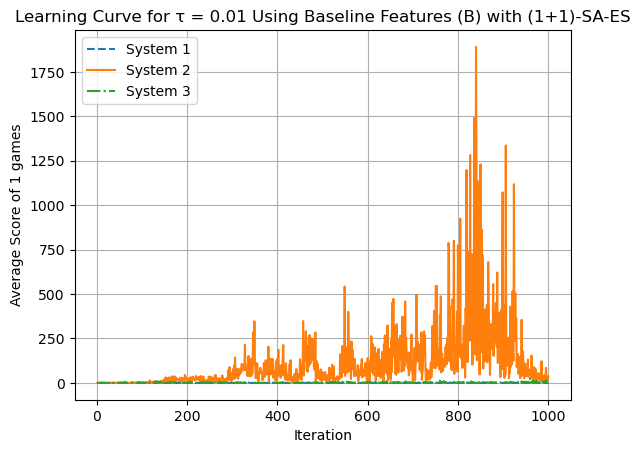

In [25]:
plt.plot(range(1, 1000 + 1), learning_curve_sa_es_0, '--', label='System 1')
plt.plot(range(1, 1000 + 1), learning_curve_sa_es_1, '-', label='System 2')
plt.plot(range(1, 1000 + 1), learning_curve_sa_es_2, '-.', label='System 3')
plt.xlabel('Iteration')
plt.ylabel(f'Average Score of {1} games')
plt.title('Learning Curve for τ = 0.01 Using Baseline Features (B) with (1+1)-SA-ES')
plt.legend()
plt.grid(True)
plt.show()

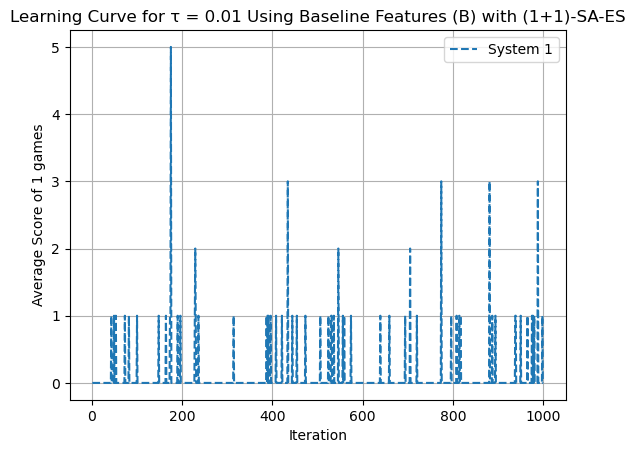

In [26]:
plt.plot(range(1, 1000 + 1), learning_curve_sa_es_0, '--', label='System 1')

plt.xlabel('Iteration')
plt.ylabel(f'Average Score of {1} games')
plt.title('Learning Curve for τ = 0.01 Using Baseline Features (B) with (1+1)-SA-ES')
plt.legend()
plt.grid(True)
plt.show()

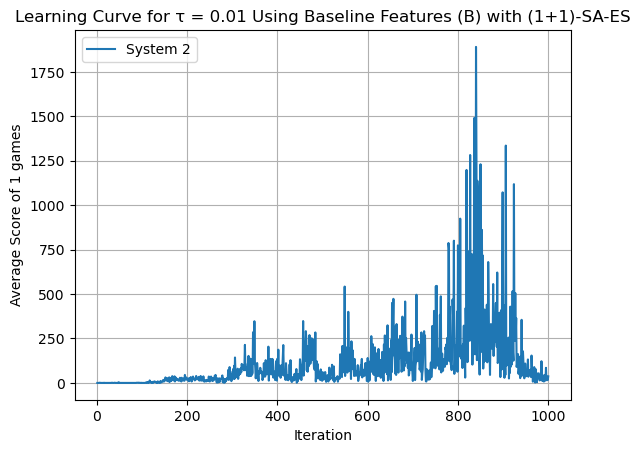

In [27]:
plt.plot(range(1, 1000 + 1), learning_curve_sa_es_1, '-', label='System 2')
plt.xlabel('Iteration')
plt.ylabel(f'Average Score of {1} games')
plt.title('Learning Curve for τ = 0.01 Using Baseline Features (B) with (1+1)-SA-ES')
plt.legend()
plt.grid(True)
plt.show()

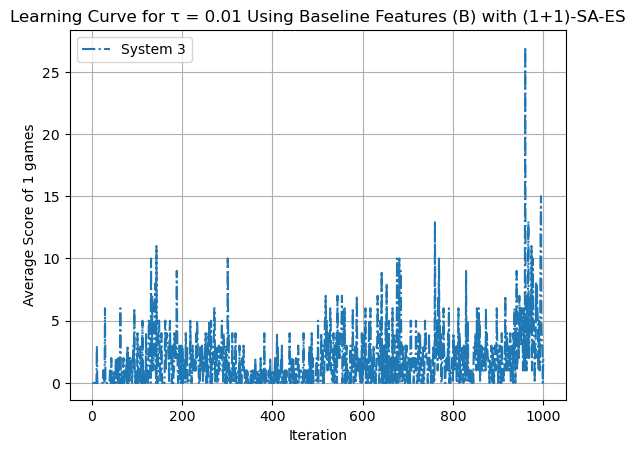

In [28]:
plt.plot(range(1, 1000 + 1), learning_curve_sa_es_2, '-.', label='System 3')
plt.xlabel('Iteration')
plt.ylabel(f'Average Score of {1} games')
plt.title('Learning Curve for τ = 0.01 Using Baseline Features (B) with (1+1)-SA-ES')
plt.legend()
plt.grid(True)
plt.show()